In [1]:
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.utils.parametrize as parametrize
import h5py
from pykeops.torch import LazyTensor, generic_sum
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time

import sys
sys.path.append("../..")
from losses import squared_error, relative_squared_error
from constraints import Symmetric, FlipSymmetric
from rkhs_functions import RKHSFunction

use_cuda = torch.cuda.is_available()
tensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor

ModuleNotFoundError: No module named 'losses'

In [ ]:
###############################################################################
#   Generate Fokker-Planck Equation Forcings and Solutions
###############################################################################

m = 20
kernel_width = 0.1

data = h5py.File("../generate_data/fplanck_gaussianKLE.hdf5", "r")
x_train, t_train = data[f"mesh{m}"].attrs["mesh"]
mx_train = len(x_train)
mt_train = len(t_train)

num_train = 500
fs_train = np.moveaxis(data[f"mesh{m}"][f"kernelwidth{kernel_width}"]["forcings"][:, :num_train], -1, 0)
us_train_clean = np.moveaxis(data[f"mesh{m}"][f"kernelwidth{kernel_width}"]["solutions"][:, :, :num_train], -1, 0)

x_train = torch.from_numpy(x_train)
t_train = torch.from_numpy(t_train)
fs_train = torch.from_numpy(fs_train)
us_train_clean = torch.from_numpy(us_train_clean)

# add noise to solutions at a given SNR
sigma = 0.0
us_train = us_train_clean + sigma * torch.std(us_train_clean) * torch.randn(num_train, mx_train, mt_train)

# train mesh
X, Y, T = torch.meshgrid(x_train, x_train, t_train)

fs_train = fs_train.view(num_train, mx_train).type(tensor)
us_train = us_train.view(num_train, mx_train*mt_train).type(tensor)

### Solve Fokker-Planck with Convolutional Space-Symmetric Time-Causal Kernel

<Figure size 432x288 with 0 Axes>

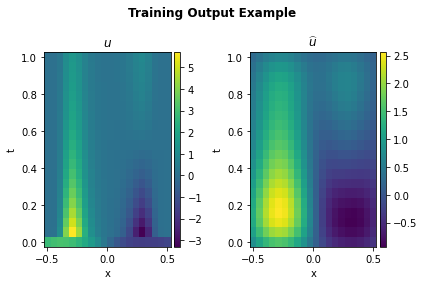

Epoch 0 Relative Squared Error 0.35375452041625977
Epoch 1 Relative Squared Error 0.2768678069114685
Epoch 2 Relative Squared Error 0.2224767506122589
Epoch 3 Relative Squared Error 0.17298127710819244
Epoch 4 Relative Squared Error 0.11988972127437592
Epoch 5 Relative Squared Error 0.10977990925312042
Epoch 6 Relative Squared Error 0.10194181650876999


<Figure size 432x288 with 0 Axes>

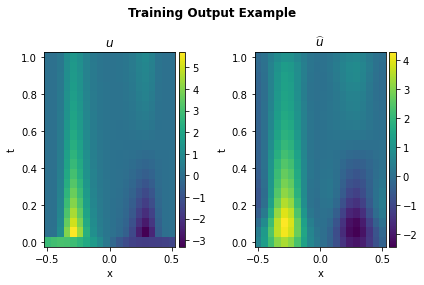

Epoch 10 Relative Squared Error 0.08127149194478989
Epoch 11 Relative Squared Error 0.0797010213136673
Epoch 12 Relative Squared Error 0.07759694010019302
Epoch 13 Relative Squared Error 0.07574812322854996
Epoch 14 Relative Squared Error 0.07401932775974274
Epoch 15 Relative Squared Error 0.07254301756620407
Epoch 16 Relative Squared Error 0.07109461724758148
Epoch 17 Relative Squared Error 0.06981737166643143
Epoch 18 Relative Squared Error 0.06859392672777176
Epoch 19 Relative Squared Error 0.06745222955942154


<Figure size 432x288 with 0 Axes>

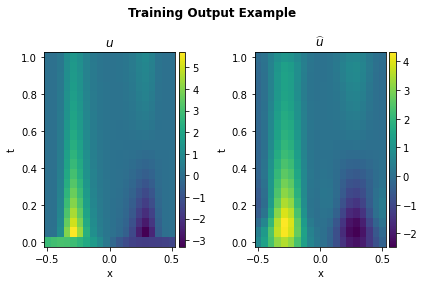

Epoch 20 Relative Squared Error 0.06636117398738861
Epoch 21 Relative Squared Error 0.06534205377101898
Epoch 22 Relative Squared Error 0.06437616050243378
Epoch 23 Relative Squared Error 0.06346476078033447
Epoch 24 Relative Squared Error 0.06260041892528534
Epoch 25 Relative Squared Error 0.06178401783108711
Epoch 26 Relative Squared Error 0.061003897339105606
Epoch 27 Relative Squared Error 0.06026448309421539
Epoch 28 Relative Squared Error 0.05956989526748657
Epoch 29 Relative Squared Error 0.05890042707324028


<Figure size 432x288 with 0 Axes>

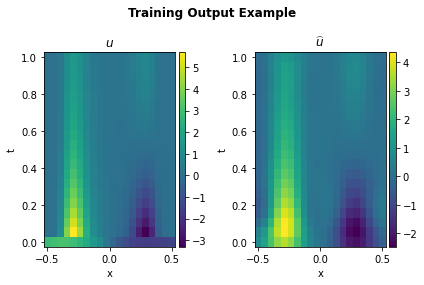

Epoch 30 Relative Squared Error 0.05826304480433464
Epoch 31 Relative Squared Error 0.057653844356536865
Epoch 32 Relative Squared Error 0.05707506835460663
Epoch 33 Relative Squared Error 0.056521497666835785
Epoch 34 Relative Squared Error 0.0559915192425251
Epoch 35 Relative Squared Error 0.0554807223379612
Epoch 36 Relative Squared Error 0.05499738082289696
Epoch 37 Relative Squared Error 0.05452974885702133
Epoch 38 Relative Squared Error 0.05407855287194252
Epoch 39 Relative Squared Error 0.05364520475268364


<Figure size 432x288 with 0 Axes>

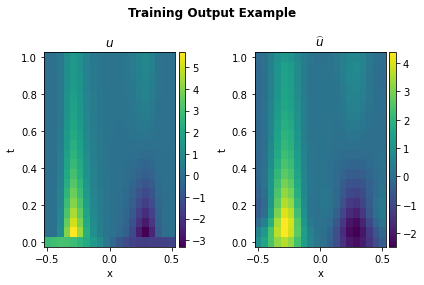

Epoch 40 Relative Squared Error 0.0532258003950119
Epoch 41 Relative Squared Error 0.052821334451436996
Epoch 42 Relative Squared Error 0.05243232473731041
Epoch 43 Relative Squared Error 0.05205634981393814
Epoch 44 Relative Squared Error 0.051696017384529114
Epoch 45 Relative Squared Error 0.05133937671780586
Epoch 46 Relative Squared Error 0.05099916830658913
Epoch 47 Relative Squared Error 0.05066946521401405
Epoch 48 Relative Squared Error 0.050347018986940384
Epoch 49 Relative Squared Error 0.05003421753644943


<Figure size 432x288 with 0 Axes>

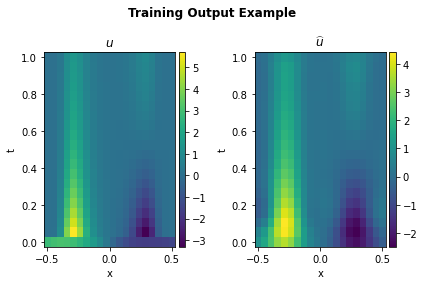

Epoch 50 Relative Squared Error 0.049726881086826324
Epoch 51 Relative Squared Error 0.049430038779973984
Epoch 52 Relative Squared Error 0.04914287105202675
Epoch 53 Relative Squared Error 0.048859819769859314
Epoch 54 Relative Squared Error 0.048584405332803726
Epoch 55 Relative Squared Error 0.04831588640809059
Epoch 56 Relative Squared Error 0.04805280640721321
Epoch 57 Relative Squared Error 0.047793447971343994
Epoch 58 Relative Squared Error 0.0475408174097538
Epoch 59 Relative Squared Error 0.04729185625910759


<Figure size 432x288 with 0 Axes>

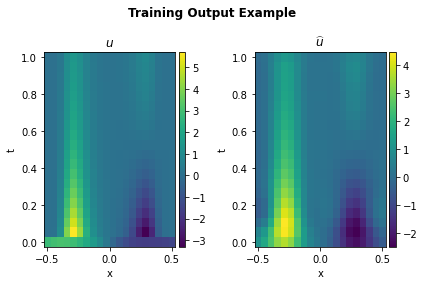

Epoch 60 Relative Squared Error 0.047050841152668
Epoch 61 Relative Squared Error 0.04681391641497612
Epoch 62 Relative Squared Error 0.04657892510294914
Epoch 63 Relative Squared Error 0.04635113105177879
Epoch 64 Relative Squared Error 0.04612724483013153
Epoch 65 Relative Squared Error 0.04590488225221634
Epoch 66 Relative Squared Error 0.04568649083375931
Epoch 67 Relative Squared Error 0.045474134385585785
Epoch 68 Relative Squared Error 0.04526156559586525
Epoch 69 Relative Squared Error 0.04505632817745209


<Figure size 432x288 with 0 Axes>

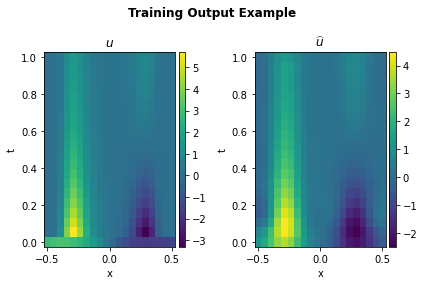

Epoch 70 Relative Squared Error 0.04485340788960457
Epoch 71 Relative Squared Error 0.04465324059128761
Epoch 72 Relative Squared Error 0.04445434734225273
Epoch 73 Relative Squared Error 0.044259488582611084
Epoch 74 Relative Squared Error 0.044067978858947754
Epoch 75 Relative Squared Error 0.04387912154197693
Epoch 76 Relative Squared Error 0.04369254410266876
Epoch 77 Relative Squared Error 0.04350891336798668
Epoch 82 Relative Squared Error 0.04262709245085716
Epoch 83 Relative Squared Error 0.042459119111299515
Epoch 84 Relative Squared Error 0.04229376092553139
Epoch 85 Relative Squared Error 0.04212839901447296
Epoch 86 Relative Squared Error 0.041965797543525696
Epoch 87 Relative Squared Error 0.04180419072508812
Epoch 88 Relative Squared Error 0.041645120829343796
Epoch 89 Relative Squared Error 0.04148770123720169


<Figure size 432x288 with 0 Axes>

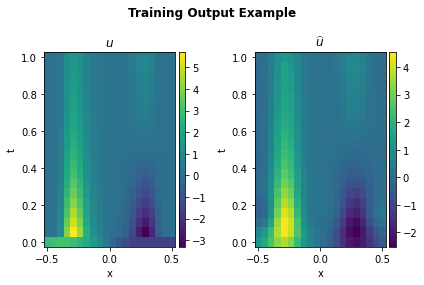

Epoch 90 Relative Squared Error 0.041333992034196854
Epoch 91 Relative Squared Error 0.041181761771440506
Epoch 92 Relative Squared Error 0.04102925583720207
Epoch 93 Relative Squared Error 0.040879592299461365
Epoch 94 Relative Squared Error 0.04073235020041466
Epoch 95 Relative Squared Error 0.04058840870857239
Epoch 96 Relative Squared Error 0.0404442735016346
Epoch 97 Relative Squared Error 0.04030179604887962
Epoch 98 Relative Squared Error 0.040161143988370895
Epoch 99 Relative Squared Error 0.04002257063984871


In [21]:
###############################################################################
#   Train PyTorch Model For a Functional Neural Network
###############################################################################

out_meshes = (x_train, x_train, t_train)
out_sizes = [len(x) for x in out_meshes]
ind_divisor = 0
f_delta = torch.prod(torch.tensor([torch.mean(torch.diff(x)) for x in out_meshes[:ind_divisor+1]]))
u_delta = torch.prod(torch.tensor([torch.mean(torch.diff(x)) for x in out_meshes[ind_divisor+1:]]))

mx_weight = 100
mt_weight = 100
x_weight = torch.linspace(x_train.min(), x_train.max(), mx_weight)
t_weight = torch.linspace(t_train.min(), t_train.max(), mt_weight)
weight_meshes = (x_weight, x_weight, t_weight)
weight_delta = torch.prod(torch.tensor([torch.mean(torch.diff(x)) for x in weight_meshes]))

kernel = "Matern5/2"
sigma = 1e-1
greens_function = RKHSFunction(out_meshes, weight_meshes, kernel=kernel, sigma=sigma, dtype=tensor)

flipsymmetry_transform = FlipSymmetric((mx_weight, mx_weight, mt_weight), 0, 1, direction="horizontal")
parametrize.register_parametrization(greens_function, "weight", flipsymmetry_transform)
#causal_transform = DomainMask((mx_weight, mx_weight, 2*mt_weight-1), Sigma_Tau>=0)
#parametrize.register_parametrization(layer, "weight", causal_transform)

# training example to plot
example_ind = 0

weight_prefactor = math.sqrt(math.prod([len(x) for x in weight_meshes]))
optimizer = torch.optim.Adam(greens_function.parameters(),
                             lr = 1e-1 * weight_prefactor,
                             amsgrad=True)

# RKHS smoothness penalty
lmbda = 0.0 #1e-5

# iterate to find the optimal network parameters
epochs = 100
batch_size = 100
freq = 10
#rses = []
G_rses = []
for epoch in range(epochs):
    perm = torch.randperm(num_train)
    for i in range(0, num_train, batch_size):
        inds = perm[i:i+batch_size]
        fs_batch = fs_train[inds, :]
        us_batch = us_train[inds, :]
    
        G = greens_function()
        G = flipsymmetry_transform(G, dims=out_sizes, direction="both") # flip symmetry constraint
        G = torch.reshape(G, (mx_train, mx_train*mt_train))
        us_hat = fs_batch @ G * f_delta
        
        loss = squared_error(us_hat, us_batch, agg="mean") * u_delta
        loss += lmbda * greens_function.square_norm()
        
        optimizer.zero_grad()
        # prevent gradient measurement to accumulate
        loss.backward()
        
        # calculate gradient in each iteration
        optimizer.step()
    
    us_hat = fs_train @ G * f_delta
    if epoch % freq == 0:
        u = us_train[example_ind, :].cpu().view(mx_train, mt_train)
        u_hat = us_hat[example_ind, :].cpu().view(mx_train, mt_train)
        plt.figure(1)
        fig, axs = plt.subplots(1, 2)
        fig.suptitle('Training Output Example', fontweight='bold')
        im = axs[0].pcolormesh(x_train, t_train, u.T)
        axs[0].set_title("$u$")
        axs[0].set_xlabel('x')
        axs[0].set_ylabel('t')
        divider = make_axes_locatable(axs[0])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        
        im = axs[1].pcolormesh(x_train, t_train, u_hat.detach().T)
        axs[1].set_title("$\widehat{u}$")
        axs[1].set_xlabel('x')
        axs[1].set_ylabel('t')
        divider = make_axes_locatable(axs[1])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        fig.tight_layout()
        plt.show()
    
    # compute train rse over all data
    rse = relative_squared_error(us_hat.cpu(), us_train.cpu(), agg="mean").item()
    print('Epoch {} Relative Squared Error {}'.format(epoch, rse))
    rses.append(rse)

In [ ]:
# Study how rate at which error goes to zero depends on Gaussian kernel width and number of discretization points.

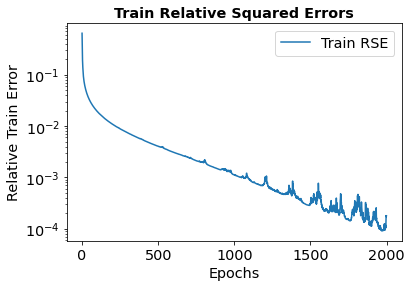

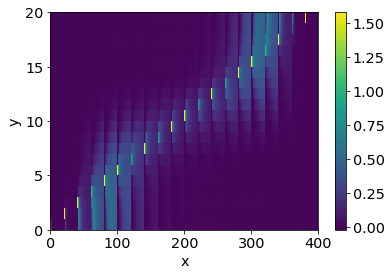

Train Relative Squared Error: 0.0001725763431750238


<Figure size 432x288 with 0 Axes>

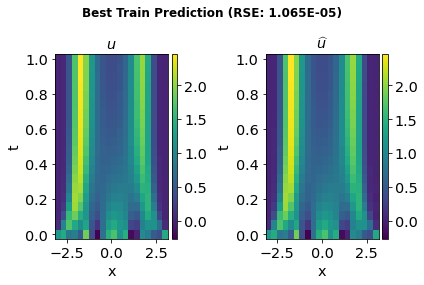

<Figure size 432x288 with 0 Axes>

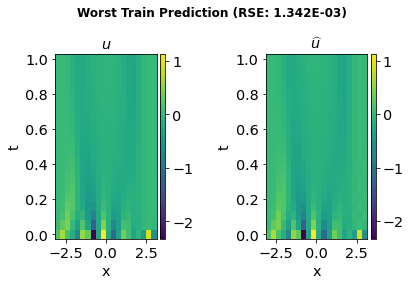

In [65]:
out_meshes = (x_train, x_train, t_train)
out_sizes = [len(x) for x in out_meshes]
greens_function.update_mesh(out_meshes)
G = greens_function()
G = flipsymmetry_transform(G, dims=out_sizes, direction="both")
G = torch.reshape(G, (mx_train, mx_train*mt_train))

# plot relative squared errors over iterations
plt.figure(2)
plt.title('Train Relative Squared Errors', fontweight='bold')
plt.plot(range(len(rses)), rses, label='Train RSE', zorder=2)
plt.xlabel('Epochs')
plt.ylabel('Relative Train Error')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

# plot learned Green's function
plt.figure(3)
plt.pcolormesh(greens_function().view((mx_train, mx_train*mt_train)).detach().cpu().numpy(), shading='auto')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# compute the relative train error on the solutions
us_train_hat = fs_train @ G * f_delta
train_rse = relative_squared_error(us_train_hat, us_train, agg="mean").item()
print('Train Relative Squared Error: ' + str(train_rse))

# plot best and worst case train predictions
train_rses = relative_squared_error(us_train_hat.cpu(), us_train.cpu())
best_rse, best_ind = torch.min(train_rses, 0)
worst_rse, worst_ind = torch.max(train_rses, 0)

plt.figure(5)
fig, axs = plt.subplots(1, 2)
fig.suptitle('Best Train Prediction (RSE: {:.3E})'.format(best_rse), fontweight='bold')
im = axs[0].pcolormesh(x_train, t_train, us_train[best_ind, :].cpu().detach().view(mx_train, mt_train).T)
axs[0].set_title("$u$")
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1].pcolormesh(x_train, t_train, us_train_hat[best_ind, :].cpu().detach().view(mx_train, mt_train).T)
axs[1].set_title("$\widehat{u}$")
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
fig.tight_layout()
plt.show()

plt.figure(6)
fig, axs = plt.subplots(1, 2)
fig.suptitle('Worst Train Prediction (RSE: {:.3E})'.format(worst_rse), fontweight='bold')
im = axs[0].pcolormesh(x_train, t_train, us_train[worst_ind, :].cpu().detach().view(mx_train, mt_train).T)
axs[0].set_title("$u$")
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1].pcolormesh(x_train, t_train, us_train_hat[worst_ind, :].cpu().detach().view(mx_train, mt_train).T)
axs[1].set_title("$\widehat{u}$")
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
fig.tight_layout()
plt.show()

20
30
40
50


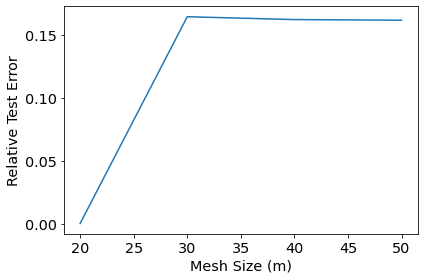

<Figure size 432x288 with 0 Axes>

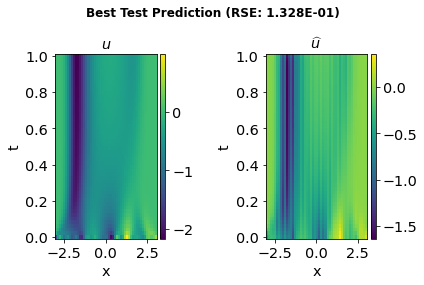

<Figure size 432x288 with 0 Axes>

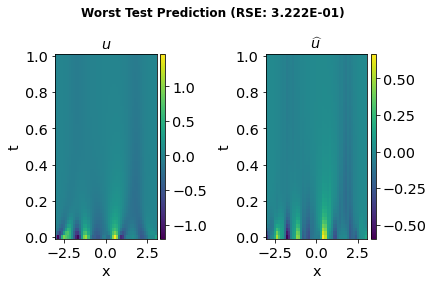

In [66]:
###############################################################################
#   Test Functional Neural Network on New Mesh Sizes
###############################################################################

# number of test samples
num_test = 500

# SNR on test data
test_sigma = 0.0

mesh_sizes = np.linspace(20, 50, 4).astype(int)

test_mesh_rses = []
for m in mesh_sizes:
    print(m)
    x_test, t_test = data[f"mesh{m}"].attrs["mesh"]
    mx_test = len(x_test)
    mt_test = len(t_test)
    
    fs_test = np.moveaxis(data[f"mesh{m}"][f"kernelwidth{kernel_width}"]["forcings"][:, :num_test], -1, 0)
    us_test_clean = np.moveaxis(data[f"mesh{m}"][f"kernelwidth{kernel_width}"]["solutions"][:, :, :num_test], -1, 0)
    
    x_test = torch.from_numpy(x_test)
    t_test = torch.from_numpy(t_test)
    fs_test = torch.from_numpy(fs_test)
    us_test_clean = torch.from_numpy(us_test_clean)

    # add noise to solutions at a given SNR
    us_test = us_test_clean + test_sigma * torch.std(us_test_clean) * torch.randn(num_test, mx_test, mt_test)

    fs_test = fs_test.view(num_test, mx_test).type(tensor)
    us_test = us_test.view(num_test, mx_test*mt_test).type(tensor)
    
    out_meshes = (x_test, x_test, t_test)
    out_sizes = [len(x) for x in out_meshes]
    greens_function.update_mesh(out_meshes)
    G = greens_function()
    G = flipsymmetry_transform(G, dims=out_sizes, direction="both")
    G = torch.reshape(G, (mx_test, mx_test*mt_test))
    
    f_delta = torch.prod(torch.tensor([torch.mean(torch.diff(x)) for x in out_meshes[:ind_divisor+1]]))
    us_test_hat = fs_test @ G * f_delta
    test_rse = relative_squared_error(us_test_hat, us_test, agg="mean").item()
    test_mesh_rses.append(test_rse)

# plot test error of model on new test meshes
plt.figure(7)
#plt.title('Adaptation to Test Meshes (Trained on m = {})'.format(m_train), y=1.05, fontweight='bold')
plt.plot(mesh_sizes, test_mesh_rses)
plt.xlabel('Mesh Size (m)')
plt.ylabel('Relative Test Error')
#plt.yscale('log')
plt.tight_layout()
plt.savefig('mesh_adapt', dpi=300)
plt.show()


# plot best and worst case train predictions
test_rses = relative_squared_error(us_test_hat.cpu(), us_test.cpu(), dim=1)
best_rse, best_ind = torch.min(test_rses, 0)
worst_rse, worst_ind = torch.max(test_rses, 0)

plt.figure(5)
fig, axs = plt.subplots(1, 2)
fig.suptitle('Best Test Prediction (RSE: {:.3E})'.format(best_rse), fontweight='bold')
im = axs[0].pcolormesh(x_test, t_test, us_test[best_ind, :].cpu().detach().view(mx_test, mt_test).T)
axs[0].set_title("$u$")
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1].pcolormesh(x_test, t_test, us_test_hat[best_ind, :].cpu().detach().view(mx_test, mt_test).T)
axs[1].set_title("$\widehat{u}$")
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
fig.tight_layout()
plt.show()

plt.figure(6)
fig, axs = plt.subplots(1, 2)
fig.suptitle('Worst Test Prediction (RSE: {:.3E})'.format(worst_rse), fontweight='bold')
im = axs[0].pcolormesh(x_test, t_test, us_test[worst_ind, :].cpu().detach().view(mx_test, mt_test).T)
axs[0].set_title("$u$")
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1].pcolormesh(x_test, t_test, us_test_hat[worst_ind, :].cpu().detach().view(mx_test, mt_test).T)
axs[1].set_title("$\widehat{u}$")
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
fig.tight_layout()
plt.show()